# Langchain experiment

## bytebytego

A large number of people have shown a keen interest in learning how to build a smart chatbot.  
To help us gain a better understanding of the process, I'm excited to bring you a special guest post by Damien Benveniste.   
He is the author of The AiEdge newsletter and was a Machine Learning Tech Lead at Meta. He holds a PhD from The Johns Hopkins University.

Below, he shares how to build a smart chatbot in 10 minutes with LangChain.

## AIEdge Newsletter

https://newsletter.theaiedge.io/p/deep-dive-how-i-taught-chatgpt-to

Deep Dive: How I taught ChatGPT to Draw Diagrams with LangChain

## Langchain crash course

https://youtu.be/LbT1yp6quS8



### Step 1. Embed private data and store in vector database

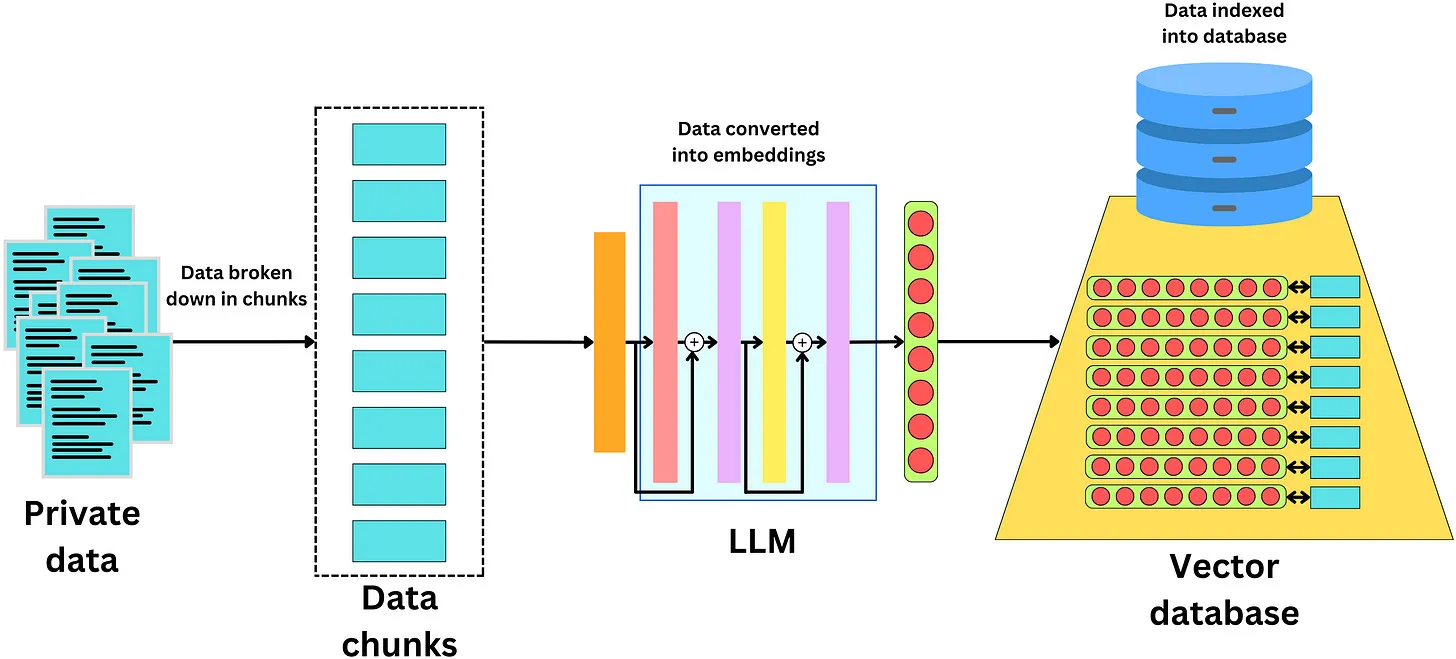

A question which we ask can be converted into an embedding, which is the query.   
We can then search for pieces of data located close to it in the embedding space and feed relevant documents to the LLM for it to extract an answer from: 

In [2]:
from langchain.document_loaders import DirectoryLoader

loader = DirectoryLoader(
    '../data/', # my local directory
    glob='**/*.pdf',     # we only get pdfs
    show_progress=True
)
docs = loader.load()
docs

  0%|          | 0/39 [00:00<?, ?it/s][nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/vscode/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
100%|██████████| 39/39 [05:10<00:00,  7.97s/it]


[Document(page_content='UNITED STATES\n\nSECURITIES AND EXCHANGE COMMISSION Washington, D.C. 20549 ________________________________________________________________________________________\n\nFORM 10-Q\n\n________________________________________________________________________________________\n\n(Mark One)\n\nQUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934\n\n☒\n\nFor the quarterly period ended March 31, 2020 OR\n\nTRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934\n\n☐\n\nFor the transition period from _______ to _______ Commission file number: 001-37580 ________________________________________________________________________________________\n\nAlphabet Inc.\n\n(Exact name of registrant as specified in its charter) ________________________________________________________________________________________\n\nDelaware\n\n61-1767919\n\n(State or other jurisdiction of incorporation or organization)\n\n(I.R.S. Emplo

In [27]:
# We split the documents into chunks. Each chunk corresponds to an embedding vector.
from langchain.text_splitter import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    chunk_size=1000, 
    chunk_overlap=0
)
docs_split = text_splitter.split_documents(docs)
docs_split

Created a chunk of size 1113, which is longer than the specified 1000
Created a chunk of size 1658, which is longer than the specified 1000
Created a chunk of size 1155, which is longer than the specified 1000
Created a chunk of size 1163, which is longer than the specified 1000
Created a chunk of size 1074, which is longer than the specified 1000
Created a chunk of size 1150, which is longer than the specified 1000
Created a chunk of size 1121, which is longer than the specified 1000
Created a chunk of size 1043, which is longer than the specified 1000
Created a chunk of size 1148, which is longer than the specified 1000
Created a chunk of size 1891, which is longer than the specified 1000
Created a chunk of size 1229, which is longer than the specified 1000
Created a chunk of size 1233, which is longer than the specified 1000
Created a chunk of size 1009, which is longer than the specified 1000
Created a chunk of size 1128, which is longer than the specified 1000
Created a chunk of s

[Document(page_content='UNITED STATES\n\nSECURITIES AND EXCHANGE COMMISSION Washington, D.C. 20549 ________________________________________________________________________________________\n\nFORM 10-Q\n\n________________________________________________________________________________________\n\n(Mark One)\n\nQUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934\n\n☒\n\nFor the quarterly period ended March 31, 2020 OR\n\nTRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934\n\n☐\n\nFor the transition period from _______ to _______ Commission file number: 001-37580 ________________________________________________________________________________________\n\nAlphabet Inc.\n\n(Exact name of registrant as specified in its charter) ________________________________________________________________________________________\n\nDelaware\n\n61-1767919\n\n(State or other jurisdiction of incorporation or organization)\n\n(I.R.S. Emplo

In [38]:
# we need to convert the data into embeddings and store them in a database

import os
import config

PINECONE_API_KEY = config.PINECONE_API_KEY # find at app.pinecone.io
PINECONE_ENV = config.PINECONE_ENV    # next to api key in console
OPENAI_API_KEY = config.OPEN_API_KEY  # found at platform.openai.com/account/api-keys

os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

The default OpenAI embedding model used in Langchain is 'text-embedding-ada-002' (OpenAI embedding models.) It is used to convert data into embedding vectors

https://platform.openai.com/docs/guides/embeddings/what-are-embeddings


In [13]:
len(docs_split)



5871

## Loading chunks into PineCone (embed using openai and upload to vector db in one go)

https://app.pinecone.io/organizations/-NY7O_pZivx2nRru7M67/projects/us-west1-gcp-free:7bdf4d0/indexes


In [19]:
import pinecone 
from langchain.vectorstores import Pinecone
from langchain.embeddings.openai import OpenAIEmbeddings

# we use the openAI embedding model
embeddings = OpenAIEmbeddings()
pinecone.init(
    api_key=PINECONE_API_KEY,
    environment=PINECONE_ENV
)

doc_db = Pinecone.from_documents(
    docs_split, 
    embeddings, 
    index_name='langchain-demo-1536-openai'
)

We can now search for relevant documents in that database using the cosine similarity metric

In [20]:
query = "What were the most important events for Google in 2021?"
search_docs = doc_db.similarity_search(query)
search_docs

[Document(page_content='This is the third quarter we’re reporting earnings during the COVID-19 pandemic. Access to information has never been more important. This year, including this quarter, showed how valuable Google’s founding product, Search, has been to people. And importantly, our products and investments are making a real difference as businesses work to recover and get back on their feet. Whether it’s finding the latest information on COVID-19 cases in their area, which local businesses are open or what online courses will help them prepare for new jobs, people continue to turn to Google Search. You can now find useful information about offerings like “no-contact delivery” or “curbside pick up” for 2 million businesses on Search and Maps. And we’ve used Google’s Duplex AI technology to make calls to businesses and confirm things like temporary closures. This has enabled us to make 3 million updates to business information globally.\n\n1', metadata={'source': '../data/abc.xyz/2

## Step2. Retrieving data with Chatgpt

We can now use a LLM to utilize the database data. Let’s get an LLM such as GPT-3 using:

In [ ]:
from langchain import OpenAI
llm = OpenAI()

or we could get ChatGPT using

In [21]:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI()

Let’s use the RetrievalQA module to query that data:  
https://python.langchain.com/docs/modules/chains/popular/vector_db_qa

some interesting examples:   https://github.com/hwchase17/langchain/issues/4573

langchain blog post about retrieva: https://blog.langchain.dev/retrieval/

So how do you go about building a chatbot that knows about your data?

The main way of doing this is through a process commonly referred to as "Retrieval Augmented Generation". In this process, rather than just passing a user question directly to a language model, the system "retrieves" any documents that could be relevant in answering the question, and then passes those documents (along with the original question) to the language model for a "generation" step.

langchain post about ChatGPT: https://blog.langchain.dev/tutorial-chatgpt-over-your-data/


langchain retrieval QA for Confluence: https://www.shakudo.io/blog/building-confluence-kb-qanda-app-langchain-chatgpt



RetrievalQA is actually a wrapper around a specific prompt.  
The chain type “stuff“ will use a prompt, assuming the whole query text fits into the context window. It uses the following prompt template:  

```
Use the following pieces of context to answer the users question. 
If you don't know the answer, just say that you don't know, don't try to make up an answer.
----------------
{context}

{question}
```

Here the context will be populated with the user’s question and the results of the retrieved documents found in the database.   
You can use other chain types: “map_reduce”, “refine”, and “map-rerank” if the text is longer than the context window.  


In [23]:
from langchain.chains import RetrievalQA

qa = RetrievalQA.from_chain_type(
    llm=llm, 
    chain_type='stuff',
    retriever=doc_db.as_retriever(),
)

query = "What were the earnings in 2022?"
result = qa.run(query)

result

'The total consolidated revenues for the full year 2022 were $283 billion, up 10% compared to the previous year.'

In [26]:
query = "Were Alphabet earnings better in 2021 or in 2022?"
result = qa.run(query)

result

'The context provides financial results for Alphabet in the first quarter of 2022 and the fourth quarter and fiscal year ended December 31, 2021. It does not provide a direct comparison of the overall earnings of Alphabet in 2021 and 2022.'

## Step 3.  Giving CHatGPT access to tools

Until now, the LLM was forced to use the database data, but we can give it access to multiple tools.  
LangChain employs "agents" which, based on user input, decide which tools to utilize from a suite to which they have access.  
The two main types are "Action Agents" which take actions one step at a time, and "Plan-and-Execute Agents," which decide a plan of actions first and then execute them one at a time.  
For example, let’s give ChatGPT access to Wikipedia.  
First, install the Wikipedia package with pip.  
Then by using the flag “ZERO_SHOT_REACT_DESCRIPTION,” the LLM is able to understand how to use Wikipedia based on the tool description:

In [28]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.agents import AgentType


llm = ChatOpenAI()
# we load wikipedia
tools = load_tools(['wikipedia'], llm=llm)

agent = initialize_agent(
    tools, 
    llm, 
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, 
    verbose=True
)

agent.run('When was google created?')



> Entering new  chain...
I need to find the date of Google's creation
Action: Wikipedia
Action Input: "Google"
Observation: Page: Google
Summary: Google LLC ( (listen)) is an American multinational technology company focusing on artificial intelligence, online advertising, search engine technology, cloud computing, computer software, quantum computing, e-commerce, and consumer electronics. It has often been considered "the most powerful company in the world" and as one of the world's most valuable brands due to its market dominance, data collection, and technological advantages in the field of artificial intelligence. Its parent company Alphabet is often considered as one of the Big Five American information technology companies, alongside Amazon, Apple, Meta, and Microsoft.
Google was founded on September 4, 1998, by computer scientists Larry Page and Sergey Brin while they were PhD students at Stanford University in California. Together they own about 14% of its publicly listed sha

'Google was founded on September 4, 1998.'

I am not showing the whole result here, but the agent called Wikipedia multiple times and generated multiple calls to the LLM. The default prompt template is as follows: 

```
Answer the following questions as best you can. You have access to the following tools:
{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question"""

Begin!

Question: {input}
Thought:{agent_scratchpad}

```

## Step4. Providing a converastion memory

Another problem is that the LLM doesn’t remember what was said



In [30]:
agent.run('When was google created?')


agent.run('By whom?')




> Entering new  chain...
I need to find out the founding date of Google.
Action: Wikipedia
Action Input: "Google founding date"
Observation: Page: Google
Summary: Google LLC ( (listen)) is an American multinational technology company focusing on artificial intelligence, online advertising, search engine technology, cloud computing, computer software, quantum computing, e-commerce, and consumer electronics. It has often been considered "the most powerful company in the world" and as one of the world's most valuable brands due to its market dominance, data collection, and technological advantages in the field of artificial intelligence. Its parent company Alphabet is often considered as one of the Big Five American information technology companies, alongside Amazon, Apple, Meta, and Microsoft.
Google was founded on September 4, 1998, by computer scientists Larry Page and Sergey Brin while they were PhD students at Stanford University in California. Together they own about 14% of its pu

OutputParserException: Could not parse LLM output: `This question is incomplete, I need more context to understand what it is asking.
Action: None`

In [31]:
# We can provide it with memory by doing this simple modification

from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory(memory_key='chat_history')

agent = initialize_agent(
    tools, 
    llm, 
    agent=AgentType.CONVERSATIONAL_REACT_DESCRIPTION, 
    verbose=True,
    memory=memory
)

In [32]:
agent.run('When was google created?')


agent.run('By whom?')



> Entering new  chain...
Thought: Do I need to use a tool? Yes
Action: Wikipedia
Action Input: Google
Observation: Page: Google
Summary: Google LLC ( (listen)) is an American multinational technology company focusing on artificial intelligence, online advertising, search engine technology, cloud computing, computer software, quantum computing, e-commerce, and consumer electronics. It has often been considered "the most powerful company in the world" and as one of the world's most valuable brands due to its market dominance, data collection, and technological advantages in the field of artificial intelligence. Its parent company Alphabet is often considered as one of the Big Five American information technology companies, alongside Amazon, Apple, Meta, and Microsoft.
Google was founded on September 4, 1998, by computer scientists Larry Page and Sergey Brin while they were PhD students at Stanford University in California. Together they own about 14% of its publicly listed shares and c

/workspaces/IsabelleLangchain/.venv/lib/python3.10/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /workspaces/IsabelleLangchain/.venv/lib/python3.10/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: PageRank
Summary: PageRank (PR) is an algorithm used by Google Search to rank web pages in their search engine results. It is named after both the term "web page" and co-founder Larry Page. PageRank is a way of measuring the importance of website pages. According to Google: PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites. Currently, PageRank is not the only algorithm used by Google to order search results, but it is the first algorithm that was used by the company, and it is the best known. As of September 24, 2019, PageRank and all associated patents are expired.



Page: PageRank algorithm in biochemistry
Summary: The PageRank algorithm has several applications in  biochemistry. ("PageRank" is an algorithm used in Google Search for ranking websites in their results, but it

Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 1.0 seconds as it raised RateLimitError: That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID a03cb41fda37c53fe2cdd90b8510b0e5 in your message.).


Thought: Do I need to use a tool? No
AI: Google was created by Larry Page and Sergey Brin while they were PhD students at Stanford University.

> Finished chain.


'Google was created by Larry Page and Sergey Brin while they were PhD students at Stanford University.'

### agent prompt template
Effectively, we modified the prompt template under the hood and allowed the LLM to use the conversation history to form its answers.  
 We can look at the new prompt template by running:

In [33]:
agent.agent.llm_chain.prompt.template 

'Assistant is a large language model trained by OpenAI.\n\nAssistant is designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, Assistant is able to generate human-like text based on the input it receives, allowing it to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.\n\nAssistant is constantly learning and improving, and its capabilities are constantly evolving. It is able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. Additionally, Assistant is able to generate its own text based on the input it receives, allowing it to engage in discussions and provide explanations and descriptions on a wide range of topics.\n\nOverall, Assistant is a powerful tool that can help with a wide range of

```
'Assistant is a large language model trained by OpenAI.

Assistant is designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, Assistant is able to generate human-like text based on the input it receives, allowing it to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

Assistant is constantly learning and improving, and its capabilities are constantly evolving. It is able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. Additionally, Assistant is able to generate its own text based on the input it receives, allowing it to engage in discussions and provide explanations and descriptions on a wide range of topics.

Overall, Assistant is a powerful tool that can help with a wide range of tasks and provide valuable insights and information on a wide range of topics. Whether you need help with a specific question or just want to have a conversation about a particular topic, Assistant is here to assist.

TOOLS:
------

Assistant has access to the following tools:

> Wikipedia: A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.

> Calculator: Useful for when you need to answer questions about math.

To use a tool, please use the following format:

```
Thought: Do I need to use a tool? Yes
Action: the action to take, should be one of [Wikipedia, Calculator]
Action Input: the input to the action\nObservation: the result of the action
```

When you have a response to say to the Human, or if you do not need to use a tool, you MUST use the format:

```
Thought: Do I need to use a tool? No
AI: [your response here]
```

Begin!

Previous conversation history:
{chat_history}

New input: {input}
{agent_scratchpad}'
```

# Complex problem with multiple tools

## Setup Google Search

Create a project in Google Cloud and enable custom search API and add an api key  
https://console.cloud.google.com/home/dashboard?project=custom-search-api-langchain  
  
https://programmablesearchengine.google.com/controlpanel/all  
Isabelle-Langchain-Search  
https://programmablesearchengine.google.com/controlpanel/overview?cx=05c163d37e3e54533  

```
<script async src="https://cse.google.com/cse.js?cx=05c163d37e3e54533">
</script>
<div class="gcse-search"></div>
```


In [34]:
import os 
import config

os.environ['GOOGLE_CSE_ID'] = config.GOOGLE_CSE_ID
os.environ['GOOGLE_API_KEY'] = config.GOOGLE_API_KEY

llm = ChatOpenAI()
tools = load_tools([
    'wikipedia', 
    'llm-math', 
    'google-search'
], llm=llm)

## Add our vector database as a tool

Add our RetrievalQA Agent as a tool

In [35]:
from langchain.agents import Tool

name = """
Alphabet quarterly earning reports database
"""

description = """
Useful for when you need to answer questions about the earnings of Google and Alphabet in 2021, 2022 and 2023. Input may be a partial or fully formed question.
"""

search_tool = Tool(
    name=name,
    func=qa.run,
    description=description,
)

tools.append(search_tool)

## Solving a difficult problem: Should I invest in Google today?

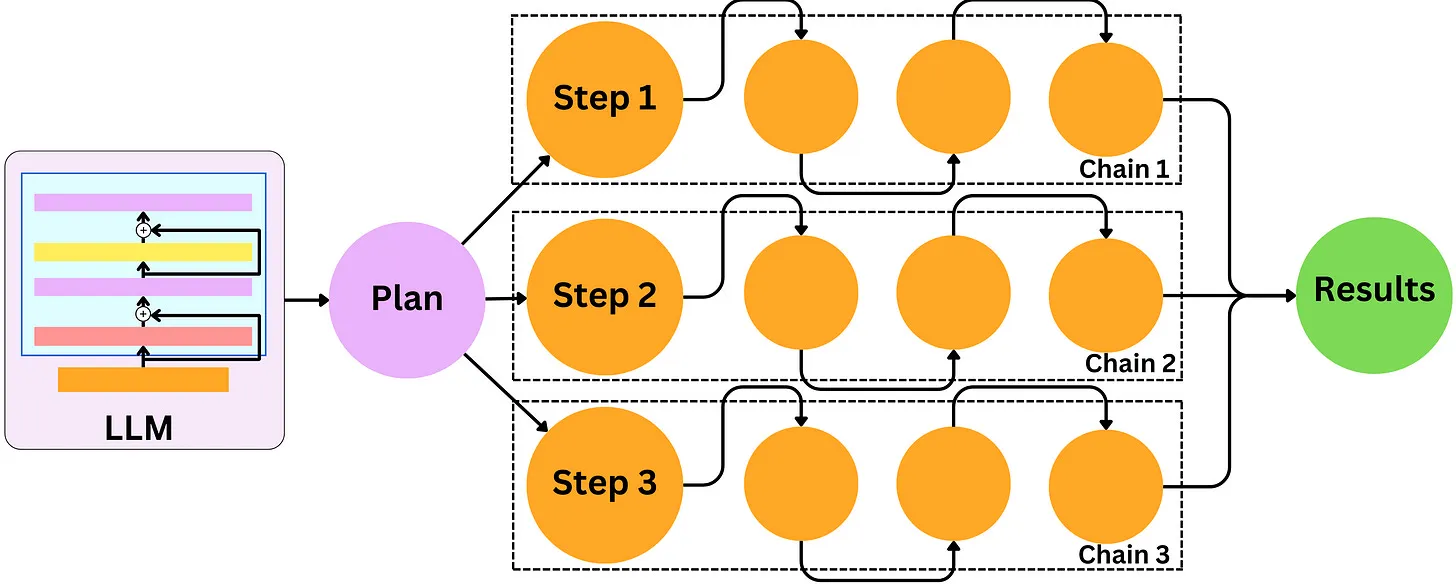

Now let's try to solve a difficult problem using the Plan and Execute toolbox.  
The LLM will create a set of steps to solve this problem and then execute each step,   
and assess if the problem has been solved

In [36]:
from langchain.experimental.plan_and_execute import (
    PlanAndExecute, 
    load_agent_executor, 
    load_chat_planner
)

memory = ConversationBufferMemory(memory_key='chat_history')
planner = load_chat_planner(llm)
executor = load_agent_executor(llm, tools, verbose=True)

agent = PlanAndExecute(
    planner=planner, 
    executor=executor, 
    verbose=True, 
    reduce_k_below_max_tokens=True
)

In [39]:
agent.run('Should I invest in Google now?')



> Entering new  chain...


AuthenticationError: <empty message>